In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
human_emis = pd.read_csv(r'D:\Sustech\研究生\课程\Environmental programming\ESE5023_Assignments_12232269\Assignment 05\global.1751_2014.csv',sep=',')
human_emis = human_emis[(human_emis['Year'] >= 1987) & (human_emis['Year'] <= 2004)]
human_emis = human_emis[['Year','Total carbon emission']].reset_index(drop=True)
human_emis

,Year,Total carbon emission
0,1987,5725
1,1988,5936
2,1989,6066
3,1990,6074
4,1991,6142
5,1992,6078
6,1993,6070
7,1994,6174
8,1995,6305
9,1996,6448


## 1.1

In [17]:
start_atm = 740
start_ocn = 900
stayy = 1987
endyy = 2004
k12 = 105/740
k21 = 102/900
atmlist = []
atmlist_ppm = []
ocnlist = []
for yy in range(stayy, endyy+1):
    gam = human_emis[human_emis['Year'] == yy]
    #the unit of total carbon emission is 10^12g C, so divided by 1000 to PgC
    gamval = gam.iloc[0,1] / 1000
    if yy == stayy:
        dN1 = -k12 * start_atm + k21 * start_ocn + gamval
        dN2 = k12 * start_atm - k21 * start_ocn
        atmlist.append(start_atm + dN1)
        atmlist_ppm.append((start_atm + dN1) / 2.13)
        ocnlist.append(start_ocn + dN2)
    else:
        yy_atm = atmlist[yy-stayy-1]
        yy_ocn = ocnlist[yy-stayy-1]
        dN1 = -k12 * yy_atm + k21 * yy_ocn + gamval
        dN2 = k12 * yy_atm - k21 * yy_ocn
        atmlist.append(yy_atm + dN1)
        atmlist_ppm.append((yy_atm + dN1) / 2.13)
        ocnlist.append(yy_ocn + dN2)
print(atmlist_ppm)

[348.69718309859155, 350.0536829082604, 351.44084611781557, 352.8004867167128, 354.16822384864224, 355.4836373965159, 356.78296741785744, 358.12247532887113, 359.51011642127673, 360.9462099618703, 362.40956650246096, 363.85765976261683, 365.27901755439615, 366.76745874890116, 368.30937996643246, 369.87194552758615, 371.58718537964984, 373.42941644742604]


## 1.2

In [18]:
N20 = 821
atmlist_be = []
atmlist_ppm_be = []
ocnlist_be = []
for yy in range(stayy, endyy+1):
    gam = human_emis[human_emis['Year'] == yy]
    #the unit of total carbon emission is 10^12g C, so divided by 1000 to PgC
    gamval = gam.iloc[0,1] / 1000
    if yy == stayy:
        buf_ft = 3.69 + 1.86 * 0.01 * start_atm - 1.80 * 10e-6 * start_atm ** 2
        dN1 = -k12 * start_atm + k21 * (N20 + buf_ft * (start_ocn - N20)) + gamval
        dN2 = k12 * start_atm - k21 * (N20 + buf_ft * (start_ocn - N20))
        atmlist_be.append(start_atm + dN1)
        atmlist_ppm_be.append((start_atm + dN1) / 2.13)
        ocnlist_be.append(start_ocn + dN2)
    else:
        buf_ft = 3.69 + 1.86 * 0.01 * yy_atm - 1.80 * 10e-6 * yy_atm ** 2
        yy_atm = atmlist[yy-stayy-1]
        yy_ocn = ocnlist[yy-stayy-1]
        dN1 = -k12 * yy_atm + k21 * (N20 + buf_ft * (yy_ocn - N20)) + gamval
        dN2 = k12 * yy_atm - k21 * k21 * (N20 + buf_ft * (yy_ocn - N20))
        atmlist_be.append(yy_atm + dN1)
        atmlist_ppm_be.append((yy_atm + dN1) / 2.13)
        ocnlist_be.append(yy_ocn + dN2)
print(atmlist_ppm_be)

[376.4281364632238, 376.8236767010656, 381.1945781592081, 383.53172624775283, 385.88816614908956, 388.20246607747, 390.50633912879186, 392.85431746987734, 395.2483520487961, 397.68609646574976, 400.14848097550873, 402.5953430137077, 405.0175647253129, 407.5100322423532, 410.05625056153855, 412.61608180085994, 415.3255972987047, 418.16255622267994]


## 1.3

In [29]:
mlo = pd.read_csv(r'D:\Sustech\研究生\课程\Environmental programming\ESE5023_Assignments_12232269\Assignment 05\co2_annmean_mlo_PS5.txt',sep='\s+')
mlo = mlo[(mlo['year'] >= 1987) & (mlo['year'] <= 2004)].reset_index(drop=True)
mlo

,year,mean,unc
0,1987,349.31,0.12
1,1988,351.69,0.12
2,1989,353.20,0.12
3,1990,354.45,0.12
4,1991,355.70,0.12
5,1992,356.54,0.12
6,1993,357.21,0.12
7,1994,358.96,0.12
8,1995,360.97,0.12
9,1996,362.74,0.12


Text(0.5, 1.0, 'CO2 trend predicted by two-box model')

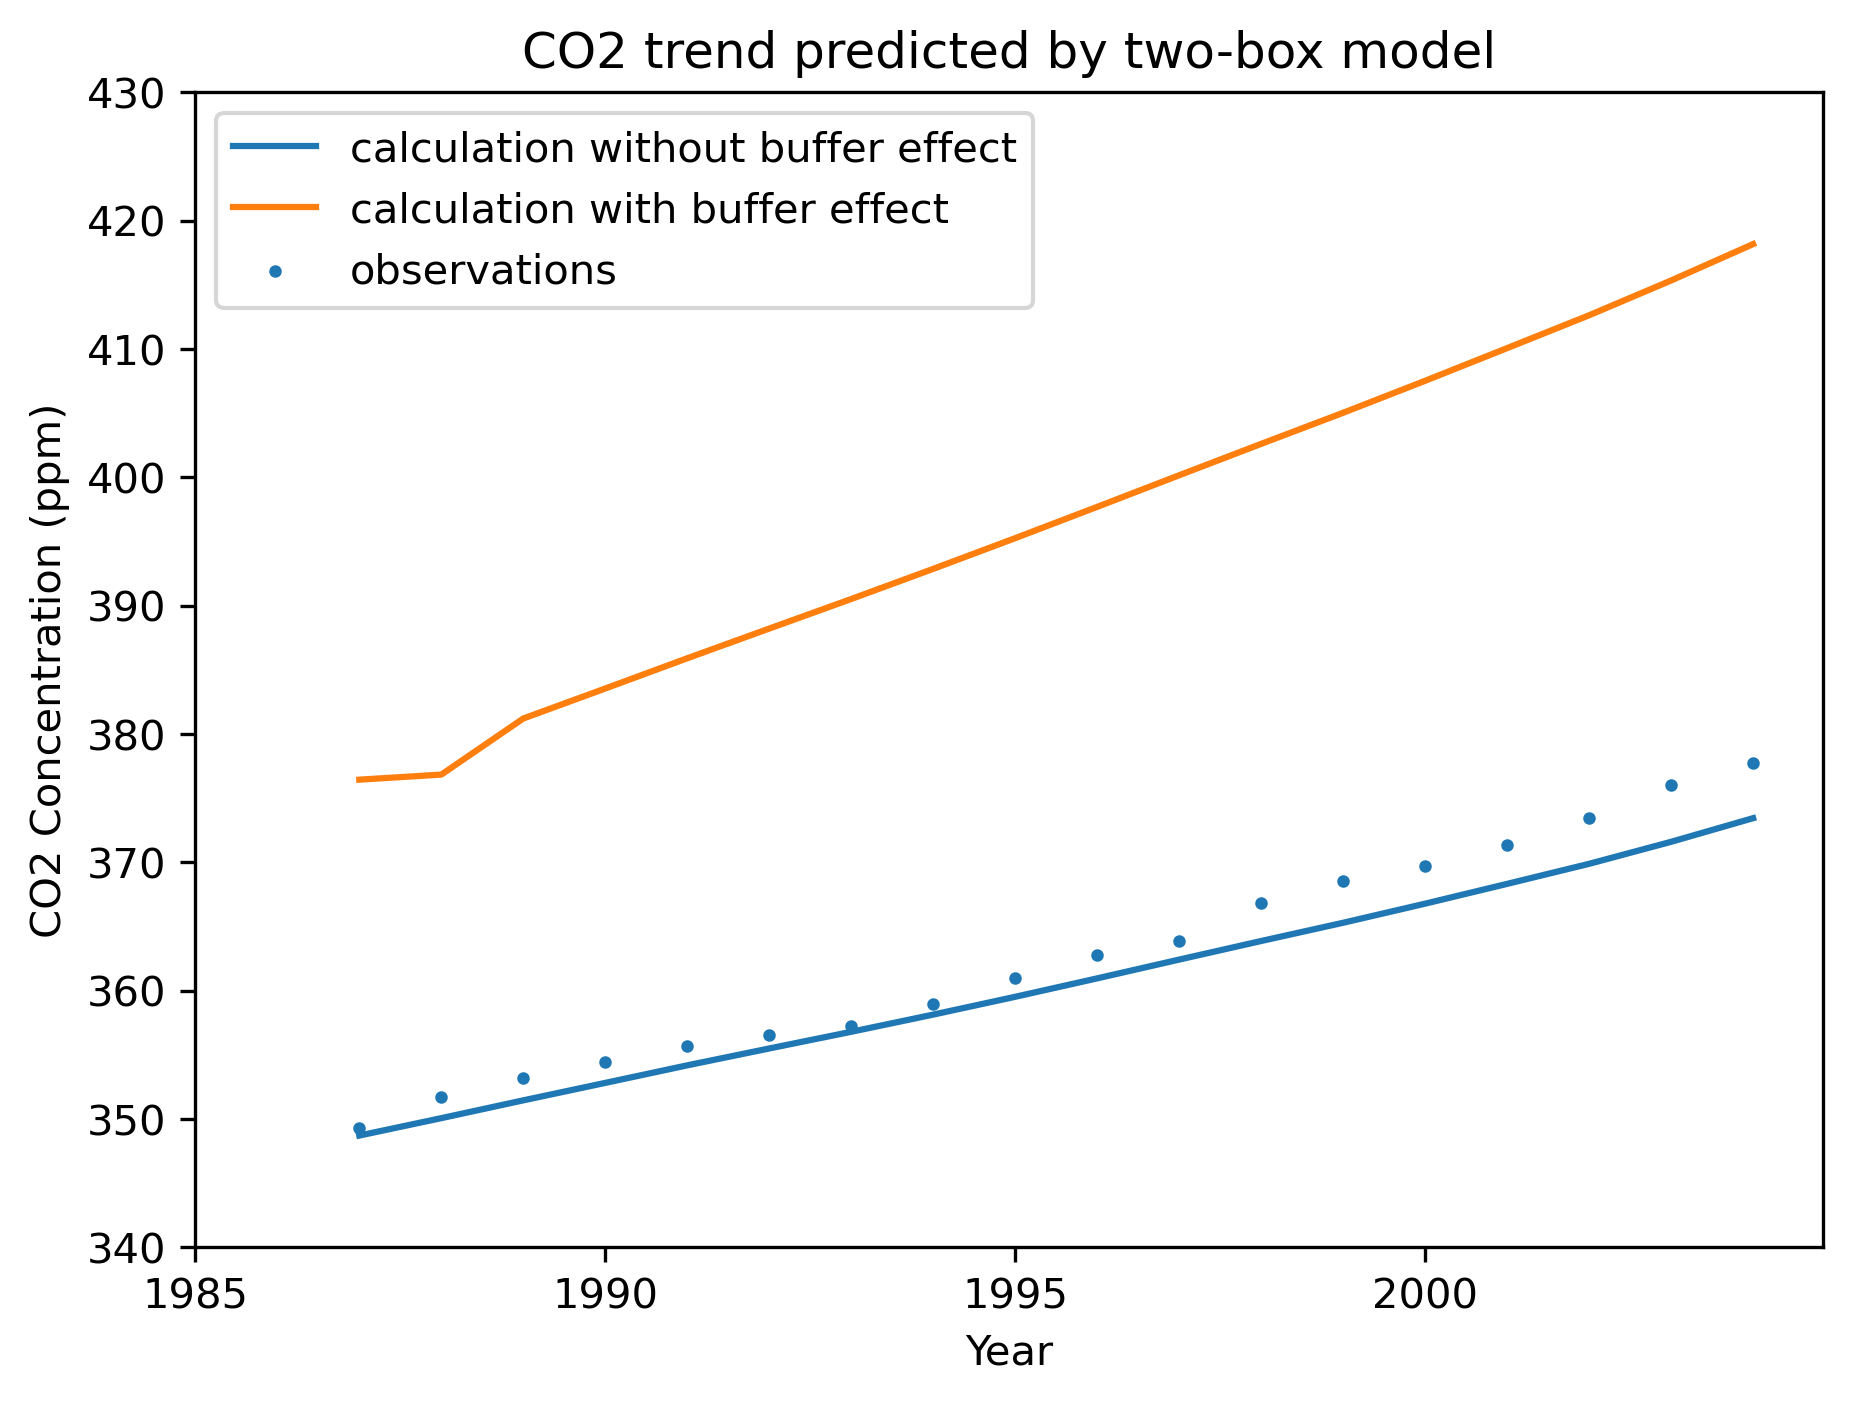

In [40]:
fig = plt.figure(figsize=(7,5),dpi=300)
x = np.arange(stayy,endyy+1)
ax1 = fig.add_subplot(111)
ax1.plot(x,atmlist_ppm,label='calculation without buffer effect')
ax1.plot(x,atmlist_ppm_be,label='calculation with buffer effect')
ax1.scatter(x,mlo['mean'],s=4,label='observations')
ax1.set_xticks(np.arange(1985,2005,5))
ax1.set_ylim(340,430)
ax1.set_ylabel('CO2 Concentration (ppm)')
ax1.set_xlabel('Year')
ax1.legend()
ax1.set_title('CO2 trend predicted by two-box model')